<font color='DarkBlue' size=+2><b>Комментарий ревьюера</b></font><br>
<font color='DarkBlue'>Привет, Анастасия! <br>Меня зовут Олег Мазуренко, и я буду проверять этот проект. Спасибо за проделанную работу! <br>Ко мне можно обращаться на «ты». Как мне обращаться, напиши.</font><br>
<font color='DarkBlue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font><br>
<font color='DarkBlue'>Синий текст &mdash; просто текст комментария.</font><br>
<font color='DarkGreen'>👌 Зеленый текст &mdash; все отлично.</font><br>
<font color='DarkMagenta'>👉 Фиолетовый текст &mdash; сделано все правильно, однако есть рекомендации, на что стоит обратить внимание. Реализованные рекомендации позволят нам наработать опыт решения задачи разными способами или посмотреть на задачу под иным углом.</font><br>
<font color='Red'>🛠 Красный текст &mdash; есть недочеты, они иногда бывают. </font><br><font color='DarkBlue'>Любая ошибка это возможность посмотреть на задачу с другой стороны и освоить новые знания, по этому не надо расстраиваться, если они есть.</font><br>
<font color='DarkBlue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты и сразу увидеть исправленное. <br>
Ответы на мои комментарии лучше тоже помечать. 
Например: </font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Теперь посмотрим, что у нас получилось!</b></font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Любой проект, как учебный, так и реальный, начинается с его описания, содержащего: описание контекста, цель и краткий план исследования. Надо его написать. Просто задание проекта изложить своими словами.</font>

# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
<br>
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
<br>
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**План работы**
<br>
Изучем данные
<br>
Проведем их предобработку
<br>
Проведем анализ и выбирем актуальные данные
<br>
Составим портрет пользователя по регионам
<br>
Проверем гипотезы
<br>
Напишем вывод

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Все проекты, это как часть реального исследования, за которое деньги заплатят или не заплатят. <br>А отчет читают: сначала описание, о чем идет речь и что делаем, потом выводы: что в итоге получили. А когда у заказчика в голове все сложилось, то смотрят как это делалось. То есть, в описании необходимо отразить какая цель исследования, какой контекст (особенности отрасли и данных), что мы планируем делать (план исследования).</font>

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#проверем на дубликаты
games.duplicated().sum()

0

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Просмотрел весь раздел, но не нашел проверки явных дубликатов. Если мы это сделали, но потом код удалили, то это не совсем правильно, пусть все знают, что мы тщательно анализируем данные.</font>

# Шаг 2. Подготовьте данные

In [6]:
games.columns = games.columns.str.lower() #Замените названия столбцов (приведите к нижнему регистру)
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Молодец! 👍 Не которые пишут длинный словарь для замены колонок.</font>

In [7]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Поменяем тип данных столбцу 'user_score' так как там значение числовое, а тип стоит object. Еще там есть аббревиатура 'tbd', что значит скорее всего что оценка не определена, возможно для формирования оценки не достаточно данных. Для нас это равносильно отсутствию оценки, поэтому заменим все 'tbd' на nan.

In [8]:
 games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно сделана замена "tbd" на NaN. Это практически аналог пропусков.</font>

In [9]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [10]:
games['year_of_release'] = games['year_of_release'].astype('Int64')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что перевели тип данных по году выпуска игр. 👍</font>

In [11]:
games['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

Поменяли еще тип данных столбцу 'year_of_release' на целочислиный.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Мы не сделали анализ причин и методов обработки пропусков.</font>
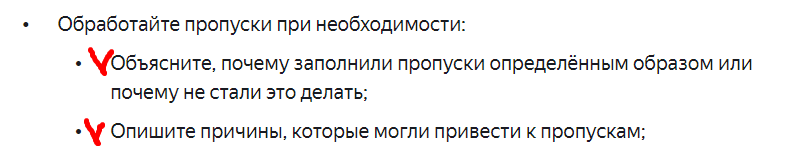

Пропуски могли повится или из-за ошибки выгрузки данных или из-за человеческого фактора, а может не заполнены намерено. Разберем поподробнее и обработаем их.

Удалим пропуски из столбцов 'name' и 'genre', потому что это всего 2 строки и никак не повлияет на общие данные.

In [12]:
games.dropna(subset=['name'], inplace=True)
games.reset_index(inplace=True,drop=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Также удалим строки в столбце 'year_of_release', так как их тоже немного и в дальнейшем мы будем активно работать с годом выпуска. В остальных столбцах имеются пропуски но заплнять их не будем, так как это может исказить данные и возможности их чем-то заполнить нет.

In [13]:
games.dropna(subset=['year_of_release'], inplace=True)
games.reset_index(inplace=True,drop=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [14]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'] 
#Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Мы молодцы, не забыли создать колонку с общими продажами. 👍 <br> А можно использовать вот такой код:</font><br>
` = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)`

In [15]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Не совсем понятное решение, у нас всего два пропуска в колонках `name` и `genre`, да еще в этих строках пропуски по отзывам и рейтингу. Может проще удалить?</font><br>
<font color='DarkMagenta'>👉 А про пропуски в колонке года релиза игры мы забыли? А если посмотреть на строчки с этими пропусками, то увидим, что там пропущены одновременно и рейтинг, и оценка критиков, и оценка пользователей. Может мы оценим % пропусков (их там около 1,6 %) и примем правильное решение (удалим напрочь).</font><br>
<font color='DarkMagenta'>👉 Я бы порекомендовал посмотреть в инете, что означает рейтинг ESRB. И пропуски в этой колонке не являются просто ошибкой заполнения данных, а несут определенную информацию. Что бы проанализировать ее, на пропуски следует поставить заглушку. Но может это мы сделаем позже? Ладно, будем смотреть дальше. </font>

<font color='DarkBlue'><b>Комментарий ревьюера 2: Глоссарий</b></font><br>
<font color='DarkGreen'>👌 В контексте анализа и предобработки датасета часто используютется термин: <b>Заглушка</b>. <br>Из словаря: "Заглушка — приспособление для закрывания отверстия наглухо." <br>В нашем контексте закрытие пропуска в датасете каким-то значением, совпадающим по типу с данными колонки таблицы. Как правило, для числовых данных заглушка должна быть вне диапазона значений колонки. При анализе по данной колонке заглушка или фильтруется, или включается в анализ, если сам пропуск не является ошибкой сбора данных и несет какой-то признак. <br>Частая ошибка, когда заглушке присваивается числовое значение, например `0`, а в данных колонки присутствуют значения `'0'`, то при преобразовании к числовому типу произойдет слияние значимых данных таблицы и заглушки.</font>

# Шаг 3. Проведите исследовательский анализ данных

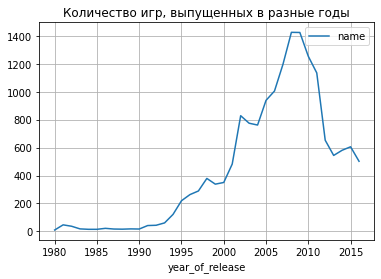

In [16]:
#Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
games.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(grid=True, title='Количество игр, выпущенных в разные годы');

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошая визуализация. 👍</font><br>
<font color='DarkMagenta'>👉 А вот подписи по оси Y явно не хватает. Это относится и к некоторым другим графикам проекта.</font>

По графику видно что начиная с 1990 года начался бурный рост выпуска игр, который продолжался примерно до 2008 года. После начался спад. Думаю данные важны где-то за последние 10 лет, чтобы учитывать последние тренды.

In [17]:
#отсортируеми по продажам
sales_platform = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
sales_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [18]:
#выбирем 10 самых продоваемых и посмотрим распределение по годам
best_sales_platform = list(sales_platform.index[:10])
best_sales_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

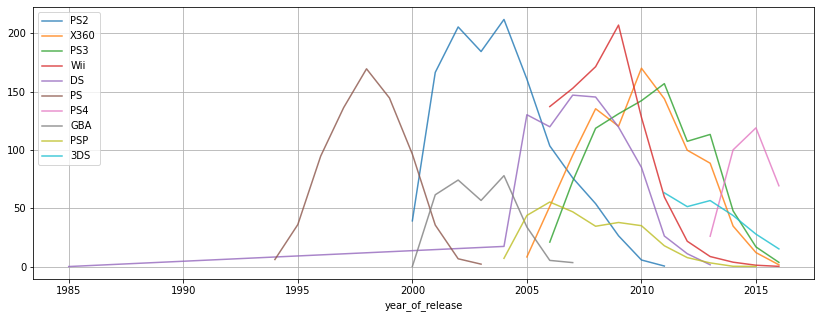

In [19]:
#постройте распределение по годам
mean_year_life = 0
for i in range(0,len(best_sales_platform)):
    platform  = games.query('platform == @best_sales_platform[@i]').groupby('year_of_release')['total_sales'].sum()
    mean_year_life += platform.count()
    platform.plot(x=platform.index, y=platform.values, label=best_sales_platform[i], alpha=0.8, grid=True, figsize=(14,5));
plt.legend();

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Наверное, стоило попробовать разобраться с таким зигзагом у платформы DS. Мы бы обнаружили, что это ошибка, так как в 1985 году этой платформы еще не существовало. Визуализация помогает не только определять закономерности, но еще и находить ошибки.</font>
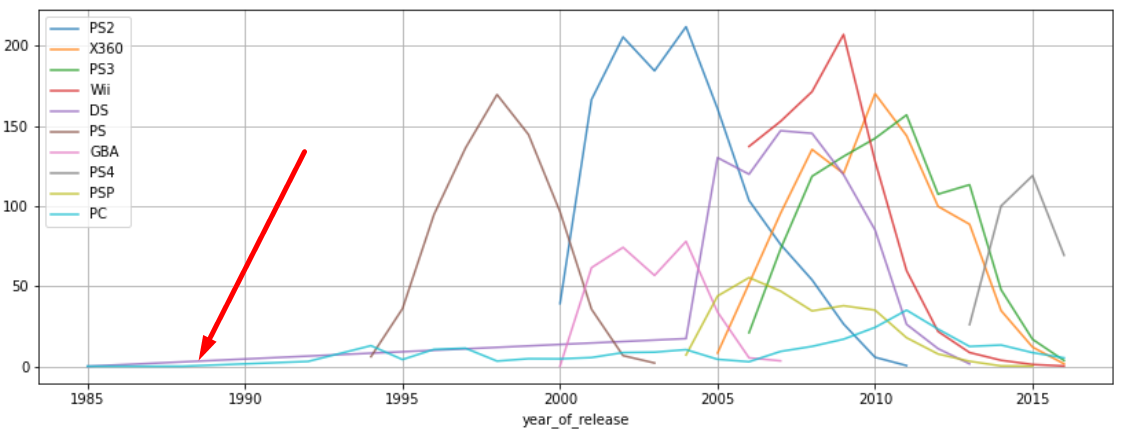

По графику видно что примерный срок жизни платформы где-то 10 лет. Но это с учетом фазы роcта в начале и падения в конце.
Также мы видели что после 2008 года началось падение выпуска игр.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватим уже отжившие тренды. Но и очень короткий период не подходит для прогнозирования, так что надо выбирать золотую середину (но не менее 2-х полных лет и не более 5 лет, включая 2016 год).</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Мы почему-то не исправили эту ошибку. Валидный актуальный период в интервале 2012-2016 и 2014-2016. Если замечание в тексте не продулировано в заключательном комментарии, то это не повод его не исправлять.</font>

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkGreen'>👌 На практике приходится проводить несколько итераций иследования, изменяя период. Период с которого результат анализа перестает изменяться, принимаем актуальным. Плюс учитываем бизнес-практику отрасли, по которой делаем проект. Аналитику все равно приходится погружаться в бизнес процессы, что бы понимать данные датасета, которые как раз и отражают эти процессы. В нашем случае, 5 лет это примерно половина срока жизни платформы.</font>

In [20]:
#Возьмите данные за соответствующий актуальный период
new_games = games[games['year_of_release'] > 2011]
new_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   Int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           1611 non-null   object 
 11  total_sales      2886 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 295.9+ KB


<AxesSubplot:xlabel='year_of_release'>

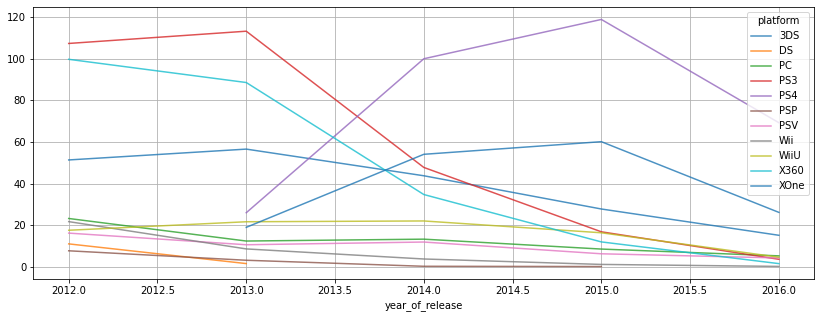

In [21]:
#Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ
new_games.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack('platform').plot(alpha=0.8, grid=True, figsize=(14,5))

Все платформы падают по прадажам. Учитывая тенденции последних лет потенциально прибыльными можно считать PS4, XOne, 3DS.

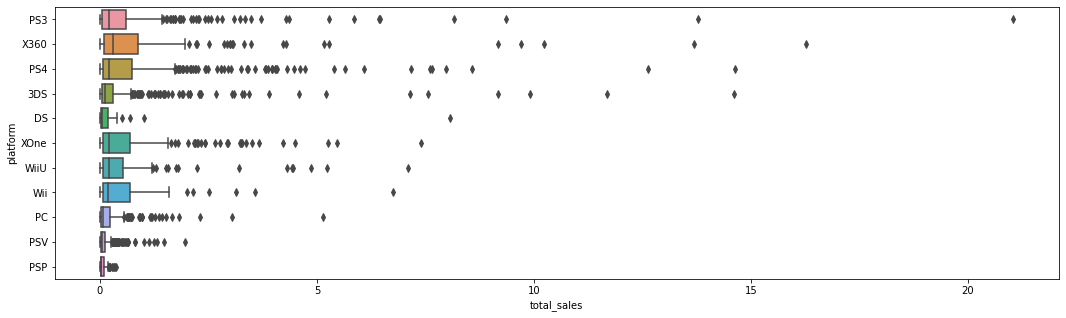

In [22]:
#Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам
plt.figure(figsize=(18,5))
sns.boxplot(data=new_games, x='total_sales', y='platform');

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 К сожалению, на диаграмме размаха видны только выбросы, и совсем не видны медиана и 75% квантиль. Для более обоснованных выводов нужно сделать дополнительный график, где будет отображена только нижняя часть boxplot-ов. Этого можно добиться, задав параметр xlim.</font><br>
<font color='DarkMagenta'>👉 Только этот график удалять не надо.</font>

(0.0, 2.0)

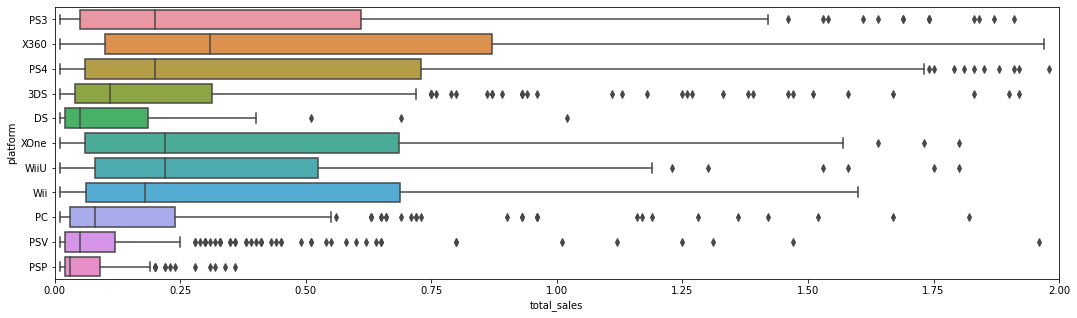

In [23]:
plt.figure(figsize=(18,5))
sns.boxplot(data=new_games, x='total_sales', y='platform');
plt.xlim(0,2)

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Теперь правильно. Для интерпретации диаграмм размаха помогает вспомнить, что означают боксплоты:</font>
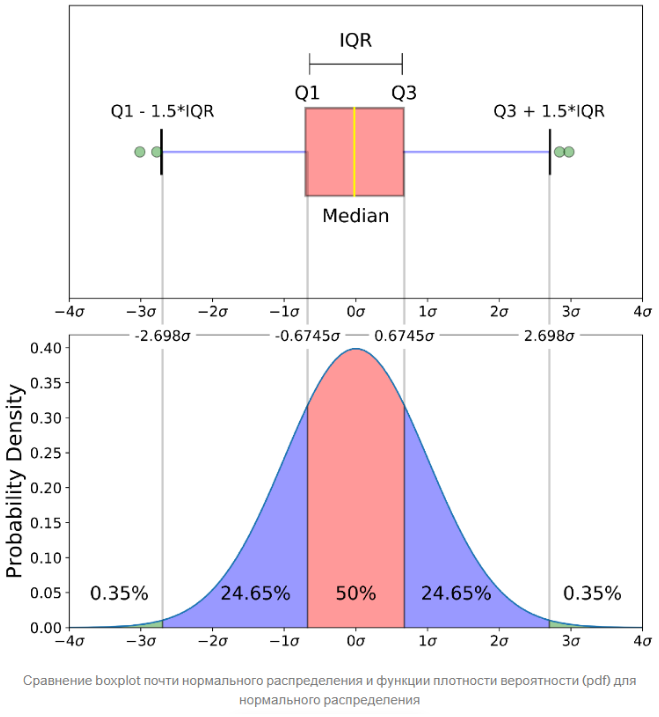

Судя по графику у нас много выбросов, которые сильно отличаютя от медианы.

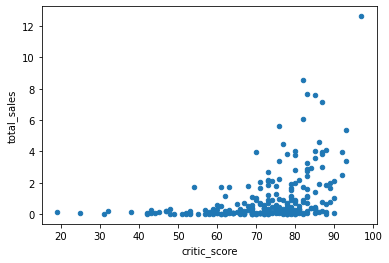

In [24]:
#Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами
new_games[new_games.platform == 'PS4'].plot(x='critic_score', y='total_sales', kind='scatter');

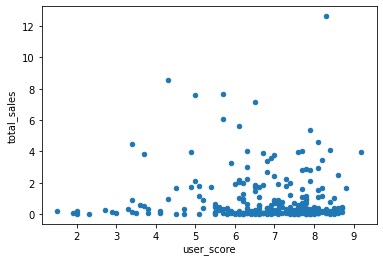

In [25]:
new_games[new_games.platform == 'PS4'].plot(x='user_score', y='total_sales', kind='scatter');

In [26]:
new_games[new_games.platform == 'PS4'][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


Зависимость продаж от оценки критиков есть, но оная слабая.

'3DS'

,total_sales,critic_score,user_score
total_sales,1.000000,0.320803,0.197583
critic_score,0.320803,1.000000,0.722762
user_score,0.197583,0.722762,1.000000


'PC'

,total_sales,critic_score,user_score
total_sales,1.000000,0.237243,-0.121867
critic_score,0.237243,1.000000,0.432587
user_score,-0.121867,0.432587,1.000000


'PS3'

,total_sales,critic_score,user_score
total_sales,1.000000,0.331497,-0.005144
critic_score,0.331497,1.000000,0.539456
user_score,-0.005144,0.539456,1.000000


'PS4'

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


'X360'

,total_sales,critic_score,user_score
total_sales,1.000000,0.360573,0.006164
critic_score,0.360573,1.000000,0.557352
user_score,0.006164,0.557352,1.000000


'XOne'

,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


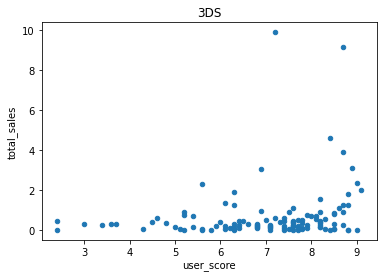

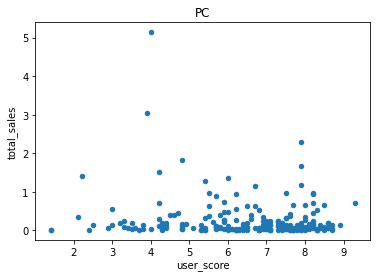

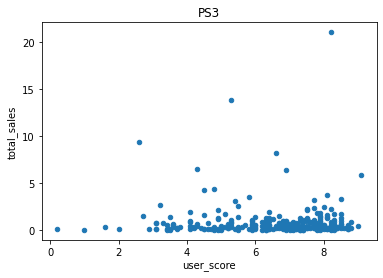

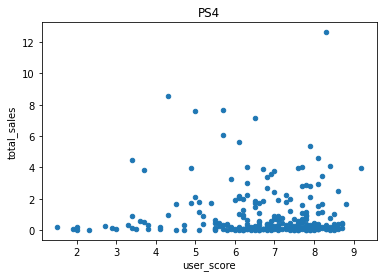

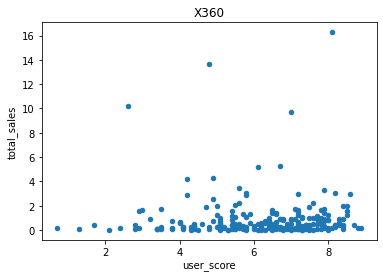

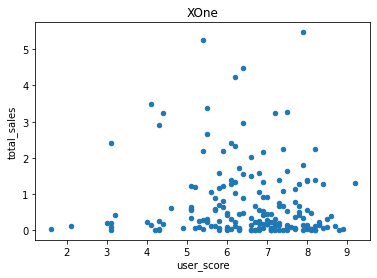

In [27]:
spicok = ['3DS', 'PC', 'PS3', 'PS4', 'X360', 'XOne']
for platform in spicok:
    new_games.query('platform == @platform').plot(x='user_score', y='total_sales', kind='scatter', title=platform)
    display(platform, new_games.query('platform == @platform')[['total_sales', 'critic_score', 'user_score']].corr())

На других популярных платформах зависимость от оценок критиков такая же слабая.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 В задании написано: <b>Соотнесите выводы с продажами игр на других платформах.</b> А мы сравнили только одну и по двум только посчитали корреляцию. Выводы, сделанные на основе диаграмм рассеяния и расчетов по нескольким платформам выглядят "весомей" и убедительней. Все платформы не надо, но хотя бы штук пять. Построение диаграмм рассеяния и расчет корреляции можно сделать циклом.</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Хорошо, исправили. <br>Для оценки корреляции лучше пользоваться вот этой шкалой:</font>
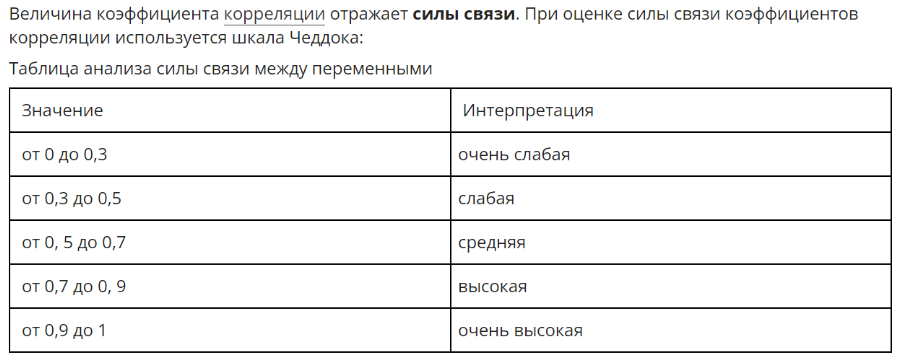

In [28]:
#Посмотрите на общее распределение игр по жанрам
new_games.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


In [29]:
new_games.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


Самые популярный жанр по сумарным продажам Action, затем идет Shooter и Role-Playing. По медианным значениям это Shooter, Platform, Sports.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 В проекте под "прибыльностью" понимается наличие устойчивого спроса пользователей на данный жанр. Можно сделать уникальный сюжет, быстрый движок, красивую графику и вложить немеряно денег в рекламу и продажи игры подпрыгнут. Но нам лучше выбирать игру из жанра, на которой есть постоянный спрос независимо от маркетинговых усилий производителей игр.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Мы здесь попали в ловушку, что максимальные продажи являются самыми прибыльными. Но у нас в данных продажи по жанру для разных платформ, и если одна платформа со своей одной игрой в данном жанре выстрелила, а остальные провалились, то мы все равно будем видеть максимум общих продаж, даже если остальные платформы провалились. Но для прибыльности нам нужен стабильные жанры, который приносит доход не зависимо от платформы, значит на этот жанр есть устойчивый спрос.</font><br>
<font color='Red'>🛠 По этому нам лучше добавить сравнение медианных продаж, проиллюстрировав их диаграммами размаха и изменить промежуточные выводы. Сделаем?</font>

# Шаг 4. Составьте портрет пользователя каждого региона

In [30]:
#Самые популярные платформы (топ-5).
sale_na_p = new_games.groupby('platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head()
sale_na_p

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


In [31]:
sale_eu_p = new_games.groupby('platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head()
sale_eu_p

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64


In [32]:
sale_jp_p = new_games.groupby('platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head()
sale_jp_p

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


<AxesSubplot:xlabel='platform'>

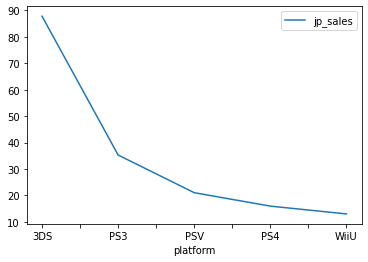

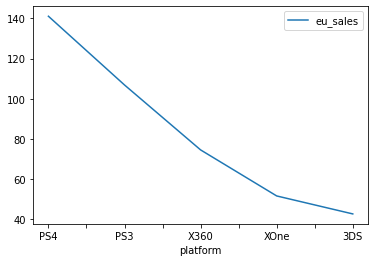

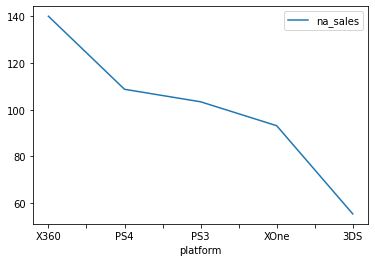

In [33]:
sale_jp_p.plot()
sale_eu_p.plot()
sale_na_p.plot()

По графикам видно что больше всего покупают в Северной Амереке, также там самая популярная X360. В Европе PS4, а в Японии 3DS. 

In [34]:
#Самые популярные жанры (топ-5)
sale_na_g = new_games.groupby('genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head()
sale_na_g

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


In [35]:
sale_eu_g = new_games.groupby('genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head()
sale_eu_g

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


In [36]:
sale_jp_g = new_games.groupby('genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head()
sale_jp_g

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


В Европе и Северной Амереки популярные жанры срвподают. В Японии самый популярный жанр Role-Playing.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 У нас в задании просят сделать анализ по топ-5. И лучше визуализировать круговой диаграммой, только продажи платформ/жанров не вошедших в топ, собрать в одной группе, например "Другие", и по платформам, и по жанрам. Тогда на круговых диаграммах хорошо видны все региональные рынки игр с разбиением на платформы/жанры. Какая платформа/жанр занимает какую долю рынка. И наша визуализация несет определенную бизнес-логику, связанную именно с долями рынка занимаемыми платформами/жанрами. А этого не дают другие виды диаграмм. Примерно вот так:</font>
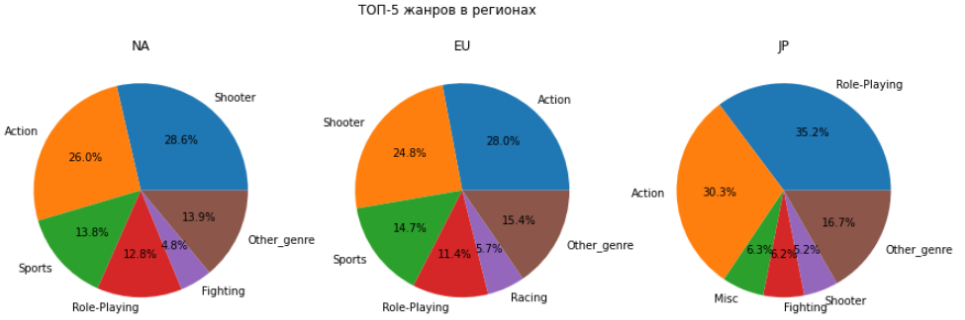

In [37]:
#рейтинг ESRB,заменим пропущенные значения
new_games['rating'] = new_games['rating'].replace(np.NaN, 'без рейтинга')

/tmp/ipykernel_192/308930079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_games['rating'] = new_games['rating'].replace(np.NaN, 'без рейтинга')


<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkGreen'>👌 Когда у нас выскакивают предупреждения, это означает, что в будущей новой версии библиотеки применяемый метод обработки будет не применим. Если мы планируем данный код использовать в будущем, то надо разобраться и изменить код. Если нам он в будущем не понадобится, то можно принудительно запретить вывод предупреждений вставив в ячейку с библиотеками вот такой код: <br>`pd.set_option('chained_assignment', None)` или такой: <br></font>
`import warnings`<br>
`warnings.filterwarnings("ignore")`

In [38]:
new_games['rating'].unique()

array(['M', 'без рейтинга', 'E', 'E10+', 'T'], dtype=object)

In [39]:
sale_na_r = new_games.groupby('rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(6)
sale_na_r

,na_sales
rating,
M,231.57
E,114.37
без рейтинга,103.31
E10+,75.70
T,66.02


In [40]:
sale_eu_r = new_games.groupby('rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head()
sale_eu_r

,eu_sales
rating,
M,193.96
E,113.03
без рейтинга,91.50
E10+,55.37
T,52.96


In [41]:
sale_jp_r = new_games.groupby('rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head()
sale_jp_r

,jp_sales
rating,
без рейтинга,108.84
E,28.33
T,26.02
M,21.20
E10+,8.19


<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Это пример, когда пропуски в датасете имеют значение. В Японии свой рейтинг и им мало интересны игры с Северо-Американским рейтингом. А есть еще рейтинги ЕС, отдельно в Германии, в Австралии и т.д. Но у нас нет по ним данным и в данном случае пропуск является признаком, что игра имеет другой рейтинг и выпускалась не в Северной Америке.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Мы при предобработке данных не поставили заглушку на пропуски в рейтинге ESRB. И игры без рейтинга оказываются полностью исключенными из анализа. Но продажи именно этих игр могут указать на ключевое различие в регионах.</font><br>
<font color='DarkMagenta'>👉 А проблема у нас в том, что если посмотреть в инете, что из себя представляет рейтинг ESRB, то окажется, что он предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется. Наша задача смотреть шире на исходный датасет, так как за цифрами находятся реальные бизнес-процессы. И мы должны это учитывать при предобработке данных.  Для этого лучше поставить заглушку и вывести ее при анализе.</font>

In [42]:
# Комментарий ревьюера
temp = new_games.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


без рейтинга    1275
M                498
T                412
E                395
E10+             306
Name: rating, dtype: int64

Можно заметить что продажи от рейтинга зависят, в Европе и Северной Амереке распределение продаж по рейтенгу совпадает. В Японии координально отличяется, так как там скорее всего своя класификация, и это видно по продажам игр без рейтинга.

# Шаг 5. Проверьте гипотезы

Проверка первой гипотезы.
Сформулируем нулевую гепотезу и альтернативную. H0 всегда формулируется так,чтобы использовать знак равенства.
Поэтому нулевая гипотеза звучит так:средние пользовательские рейтинги платформ Xbox One и PC равны.
Альтернативная: средние пользовательские рейтинги платформ Xbox One и PC различаются.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, правильно сформулированы гипотезы.</font>

In [43]:
XOne = new_games[new_games['platform']=='XOne']['user_score'].dropna()
PC = new_games[new_games['platform']=='PC']['user_score'].dropna()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что отфильтровали пропуски. 👍</font>

Для проверки гипотезы о равенстве среднего двухгенеральных совокупностей по взятым из них выборкам, применяется метод scipy.stats.ttest_ind(), так что воспользуемся им.

In [44]:
results = st.ttest_ind(XOne,PC)
results.pvalue

0.5535080500643661

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно, что для тестирования гипотез использован двусторонний t-тест Стьюдента.</font>

In [45]:
alpha = 0.05
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги платформ Xbox One и PC одинаковые, данные не протеворечат этой гипотезе.

Проверка второй гипотезы. Сформулируем нулевую гепотезу и альтернативную. H0 всегда формулируется так,чтобы использовать знак равенства. Поэтому нулевая гипотеза звучит так: cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны. Альтернативная: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [46]:
Action = new_games[new_games['genre']=='Action']['user_score'].dropna()
Sports = new_games[new_games['genre']=='Sports']['user_score'].dropna()

In [47]:
results1 = st.ttest_ind(Action,Sports)
results1.pvalue

3.7163089460934874e-26

In [48]:
if (results1.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные, данные не протеворечат этой гипотезе

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkMagenta'>👉 Правильнее было написать, что на имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Было бы правильным показать дополнительно средние пользовательские рейтинги и по платформам, и по жанрам, как иллюстрации не противоречивости наших гипотез.</font>

# Шаг 6. Напишите общий вывод

В ходе работы были предобработаны данные: 
<br>
изменены названия и типы данных столбцов где это было необходимо. 
<br>
обработаны пропуски и созданы столбцы необходимые в дальнейшем.
<br>
В ходе анализа были отброшены слишком старые данные и учтен примерный жизненый цикл платформы.
<br>
После анализа потенциально прибыльными и на которые можно расчитывать в будущем можно платформы: PS4, XOne, 3DS  PC PS3, X360.
<br>
Cамые популярные жанры со стабильным спросом Shooter и Sports. А рейтинг М и Е, но надо учитывать игры произведенные в других странах и не имеющие рейтинга ESRB.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Цель нашего исследования понять, на что потратить рекламный бюджет. В исследовании мы проанализировали игры с разных сторон. Логично, что рекламный отдел от нас ждет на какие платформы (1-2 штуки, на большее у нас не хватит рекламного бюджета), с каким жанром, с каким рейтингом ESRB и в каком регионе рекламировать. Стоит ли обращать внимание на отзывы или нет.<br>У нас вся информация в проекте уже есть, но они же не аналитики, им надо пальцем показать, точнее акцентировать их креативное внимание. Сделаем?</font><br>
<font color='DarkMagenta'>👉 Возможно, придется переделать часть выводов после исправления ошибок. </font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера</b></font><br><br>
<font color='DarkGreen'>👌 Анастасия, проект отлично структурирован и проработан.<br>Так держать и дальше!<br></font>
<font color='Red'>🛠 Что нам нужно, что бы сделать проект лучше:</font><br>
<font color='Red'>🛠 Необходимо сделать описание проекта. Сделать анализ причин и методов обработки пропусков. На диаграммах размаха добавить масштабированную диаграмму. Анализ влияния отзывов на продажи надо провести по нескольким платформам. В анализе игр по жанрам надо проанализировать медианные значения продаж и построить диаграммы размаха. Переделать анализ влияния рейтинга ESRB на продажи в регионах.</font><br>
<font color='DarkMagenta'>👉 При исправлении ошибок и недочетов мы приобретем дополнительный опыт и навыки!</font><br>
<font color='DarkGreen'>👌 Жду окончательный вариант! Успехов.</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 2</b></font><br><br>
<font color='DarkGreen'>👌 Анастасия, у нас пропущена одна ошибка.<br></font>
<font color='Red'>🛠 Что нужно доделать:</font><br>
<font color='Red'>🛠 Выбрать меньший актуальный период для прогнозирования.</font><br>
<font color='DarkMagenta'>👉 Обращаю внимание, что при изменении периода анализа могут измениться промежуточные выводы. Что бы не появилась новая ошибка, следует внимательно просмореть весь проект.</font><br>
<font color='DarkGreen'>👌 Жду окончательный вариант! Успехов.</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 3</b></font><br><br>
<font color='DarkGreen'>👌 Анастасия! Нам удалось справиться со всеми подводными камнями в проекте.  Мы молодцы! 😄<br>
Мы узнали, что не все пропуски просто ошибки сбора данных, а несут свои признаки. Для этого нам понадобилось за данными датасета увидеть смысл этих данных и бизнес-процессы, которые за ними скрываются. Мы узнали, что медианы могут дать дополнительную информацию при анализе. Это наши новые знания и навыки, которые нам пригодятся в будущем!<br></font>
<font color='DarkGreen'>👌 Теперь, вперед за новыми знаниями и навыками! Удачи! 😉</font>